In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from benchmark import benchmark
from sum_atomic import sum_atomic
from sum_rows import sum_rows

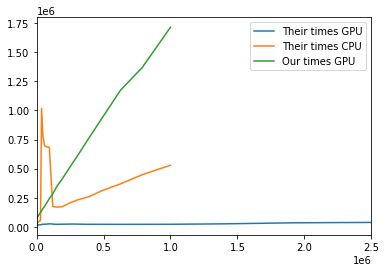

In [12]:
our_times = []
torch_times = []
torch_cpu_times = []
torch_cpu_sizes = torch.tensor(np.ceil(np.geomspace(10, 1_000_000, 50))).long()
torch_sizes = torch.tensor(np.ceil(np.geomspace(10, 100_000_000, 50))).long()
our_sizes = torch.tensor(np.ceil(np.geomspace(10, 1_000_000, 50))).long()
for size in torch_sizes:
    values = torch.randn(size).cuda()
    torch_times.append(benchmark(lambda: torch.sum(values), 20))
for size in torch_cpu_sizes:
    values = torch.randn(size).cuda()
    torch_cpu_times.append(benchmark(lambda: torch.sum(values.cpu()), 20))
for size in our_sizes:
    values = torch.randn(size).cuda()
    our_times.append(benchmark(lambda: sum_atomic(values), 20))
plt.plot(torch_sizes, torch_times, label="Their times GPU")
plt.plot(torch_cpu_sizes, torch_cpu_times, label="Their times CPU")
plt.plot(our_sizes, our_times, label="Our times GPU")
plt.xlim([0, 0.025*10**8])
plt.legend()
plt.show()

In [4]:
a = torch.randn([1000000,1000]).cuda()
b = a.T.clone().cuda()
a.contiguous()
b.contiguous()
print(benchmark(lambda: sum_rows(a), 20))
print(benchmark(lambda: sum_rows(b), 20))


103993081.95
267107802.85
